In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import os
os.chdir('drive/My Drive/Colab Notebooks/Face_recognition')
del os


FileNotFoundError: ignored

In [52]:
import numpy as np

data=np.load('olivetti_faces.npy')

print(data.shape)

target=np.load('olivetti_faces_target.npy')

print(target.shape)

print(np.unique(target))

from PIL import Image
img=Image.fromarray(np.reshape(data[0]*255,(64,64)))
img.show()
del Image
del img
data=np.reshape(data,(400,64,64,1))
print(data.shape)
del np

(400, 64, 64)
(400,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
(400, 64, 64, 1)


In [53]:
print(bin(10).split('b')[1])
print('0'*0)

1010



In [54]:
import numpy as np
new_target=np.empty((400,6))
for i in range(400):
  binary=bin(int(target[i])).split('b')[1]
  new_target[i]=np.array( list('0'*(6-len(binary))+binary)  )
print(new_target.shape)
print(new_target[1])


(400, 6)
[0. 0. 0. 0. 0. 0.]


In [0]:
#target=target/39

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(data,new_target,stratify=target,random_state=0)
del train_test_split

In [58]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(300, 64, 64, 1) (100, 64, 64, 1) (300, 6) (100, 6)


In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Input
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
name='model10'
import os 
try:
  os.mkdir(name)
except:
  pass


In [0]:
inputs=Input((64,64,1))
x=Conv2D(64,(3,3),padding='same',activation='relu',use_bias=True)(inputs)
x=MaxPool2D((2,2))(x)
x=Conv2D(32,(3,3),padding='same',activation='relu',use_bias=True)(x)
x=MaxPool2D((2,2))(x)
x=Conv2D(16,(3,3),padding='same',activation='relu',use_bias=True)(x)
x=MaxPool2D((2,2))(x)
x=Conv2D(8,(3,3),padding='same',activation='relu',use_bias=True)(x)
x=MaxPool2D((2,2))(x)
x=Conv2D(4,(3,3),padding='same',activation='relu',use_bias=True)(x)
x=MaxPool2D((2,2))(x)
x=Flatten()(x)
x=Model(inputs=inputs,outputs=x)


In [0]:
y=Conv2D(64,(3,3),padding='same',activation='relu',use_bias=True)(x.input)
y=MaxPool2D((2,2))(y)
y=Conv2D(32,(3,3),padding='same',activation='relu',use_bias=True)(y)
y=MaxPool2D((2,2))(y)
y=Conv2D(16,(3,3),padding='same',activation='relu',use_bias=True)(y)
y=MaxPool2D((2,2))(y)
y=Conv2D(8,(3,3),padding='same',activation='relu',use_bias=True)(y)
y=MaxPool2D((2,2))(y)
y=Conv2D(4,(3,3),padding='same',activation='relu',use_bias=True)(y)
y=MaxPool2D((2,2))(y)

y=Flatten()(y)
y=Model(inputs=x.input,outputs=y)


In [0]:
from tensorflow.keras.layers import Concatenate
merged_input=Concatenate()([x.output,y.output])
model=Dense(100,activation='relu',use_bias=True)(merged_input)
model=Dense(50,activation='relu',use_bias=True)(model)
model=Dense(6,activation='relu',use_bias=True)(model)
model=Model(inputs=x.input,outputs=model)

In [73]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
filepath=name+"/weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=callbacks_list,epochs=300,batch_size=20)

Epoch 1/300
15/15 [==============================] - ETA: 0s - loss: 5.1332 - accuracy: 0.4100
Epoch 00001: val_accuracy improved from -inf to 0.39000, saving model to model10/weights.hdf5
15/15 [==============================] - 5s 321ms/step - loss: 5.1332 - accuracy: 0.4100 - val_loss: 5.0882 - val_accuracy: 0.3900
Epoch 2/300
15/15 [==============================] - ETA: 0s - loss: 5.0860 - accuracy: 0.4033
Epoch 00002: val_accuracy did not improve from 0.39000
15/15 [==============================] - 5s 304ms/step - loss: 5.0860 - accuracy: 0.4033 - val_loss: 5.0818 - val_accuracy: 0.3900
Epoch 3/300
15/15 [==============================] - ETA: 0s - loss: 5.0859 - accuracy: 0.4033
Epoch 00003: val_accuracy did not improve from 0.39000
15/15 [==============================] - 4s 300ms/step - loss: 5.0859 - accuracy: 0.4033 - val_loss: 5.0804 - val_accuracy: 0.3900
Epoch 4/300
15/15 [==============================] - ETA: 0s - loss: 5.0852 - accuracy: 0.4033
Epoch 00004: val_accura

In [74]:
print(y.summary(),x.summary())

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 8, 8, 16)          0  

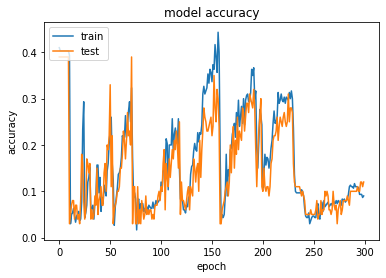

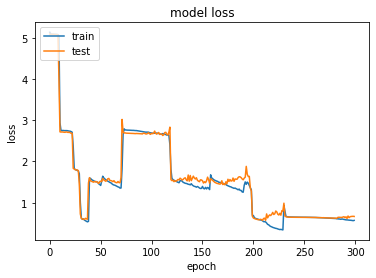

In [75]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file=name+'/'+name+'.png')
del plot_model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(name+'/test_vs_train_accuracy.jpg')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(name+'/test_vs_train_loss.jpg')
plt.show()
del plt

In [0]:
del model

In [0]:
del x,y